In [1]:
from sklearn.datasets import make_blobs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
X,y = make_blobs(n_samples=150,
                 n_features=2,
                 centers=3,
                 cluster_std=0.5,
                 shuffle=True,
                 random_state=0)

X,xtest,y,ytest = train_test_split(X,y,test_size=0.2)

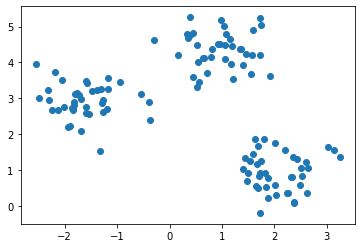

In [3]:
data = pd.DataFrame(X)
plt.scatter(data.iloc[:,0],data.iloc[:,1])
#观察数据

In [4]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


km  = KMeans()
class kmeans:

    def __init__(self,data=[], n_clusters=8, max_iter=300, tol=1e-4):
        self.data = data
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

    def fit(self,data, n_clusters, max_iter=300, tol=1e-4,show_iterate=False):
        self.data = data
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol

        n = len(data)

        # 随机选取数据集中的 n_clusters 个点索引
        center_index = np.floor(np.random.random(size=n_clusters) * n).astype(int)
        print(center_index)

        # 随机取数据集中的 n_clusters 个点坐标作为初始中心点
        self.center = data[center_index]

        self.cls = np.zeros([n], np.int)

        print('初始中心点坐标：\n', self.center)
        run = True
        iterate_time = 0
        while run:
            iterate_time += 1
            for i in range(n):
                # 求各点到中心点的距离
                distence = np.sum((self.center - data[i]) ** 2, axis=1)

                # 将这个点归为和距离最近的中心点一类
                self.cls[i] = np.argmin(distence)

            run = False
            # 计算更新每个群组的中心点
            for i in range(n_clusters):

                # 找到属于该类的所有样本
                club = data[self.cls == i]

                # axis=0表示按列求平均值，计算出新的中心点
                newcenter = np.mean(club, axis=0)

                # 计算新中心点和原来的位置差
                dif = np.abs(self.center[i] - newcenter)

                # 如果中心点变化超过阈值则继续
                if np.sum(dif, axis=0) > tol:
                    self.center[i] = newcenter
                    run = True

            # 超过迭代次数则停止
            if iterate_time >= max_iter:
                break
                
            if show_iterate:
                    print('新中心点坐标=\n', self.center)

        if show_iterate:
            
            print('迭代次数：', iterate_time)

            # 绘制 数据点 和 中心点
            for i in range(n_clusters):
                club = data[self.cls == i]
                plt.scatter(club[:, 0], club[:, 1])
            plt.scatter(self.center[:, 0], self.center[:, 1], marker='s')
            plt.show()

    def predict(self,predict_data,show_plt=False):

        for i in range(self.n_clusters):
            club = self.data[self.cls == i]
            plt.scatter(club[:, 0], club[:, 1])
        plt.scatter(self.center[:, 0], self.center[:, 1], marker='s')
        

        result_list = []
        n = len(predict_data)
        for i in predict_data:
            plt.scatter(i[0],i[1],marker="+",color = 'r')
            distences ={}
            for j in range(self.n_clusters):
                distence=np.sum(np.sum((self.data[self.cls==j]-i)**2,axis=1))
                distences.setdefault(distence,j)
            y_predict = distences[min(distences.keys())]
            result_list.append(y_predict)
            plt.plot((i[0],self.center[y_predict][0]),(i[1],self.center[y_predict][1]),color = "r")
            
        print("预测结果：",result_list)
           
        if show_plt:
            print("预测散点图连线：\n")
            plt.show()

[61 92 44]
初始中心点坐标：
 [[-0.95073823  3.45769156]
 [ 2.36230721  1.358767  ]
 [ 1.8062513   1.86242969]]
新中心点坐标=
 [[-0.53523089  3.59975052]
 [ 2.21474756  0.76909167]
 [ 1.60913371  2.47148598]]
新中心点坐标=
 [[-0.71918395  3.50443296]
 [ 2.10954648  0.84569398]
 [ 1.58169084  3.67387576]]
新中心点坐标=
 [[-1.46334755  3.07517263]
 [ 2.07782337  0.93730022]
 [ 1.04778163  4.32292103]]
新中心点坐标=
 [[-1.62368221  2.92496409]
 [ 2.07782337  0.93730022]
 [ 0.95467573  4.34900687]]
新中心点坐标=
 [[-1.62368221  2.92496409]
 [ 2.07782337  0.93730022]
 [ 0.95467573  4.34900687]]
迭代次数： 5


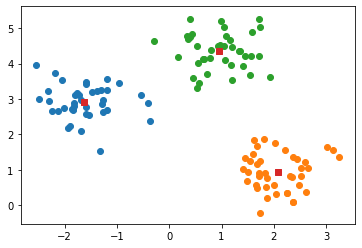

预测结果： [1, 2, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 0, 0]
预测散点图连线：



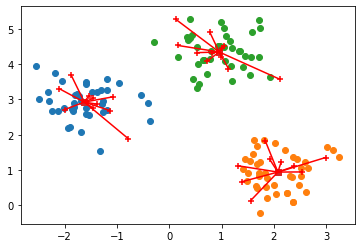

[1 0 1 0 0 1 1 0 1 2 0 0 0 2 1 2 0 0 2 2 0 0 1 1 1 2 2 2 2 2]


In [5]:
km = kmeans()
km.fit(X, 3,show_iterate=True)
km.predict(xtest,show_plt=True)
print(ytest)